# Gradient Boost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import math
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, accuracy_score, f1_score, classification_report,confusion_matrix
import csv
import datetime
import random
from operator import sub
import xgboost as xgb
from sklearn import preprocessing, ensemble

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/data/train_ver2.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
file = open("/content/gdrive/My Drive/data/train_ver2.csv")

In [ ]:
csv.DictReader(file)

In [ ]:
file.close()

In [ ]:
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 100000
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.426556e+06,1.423629e+06,1.423629e+06,1423629.0,1.416546e+06,1.423629e+06,1.132500e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.426556e+06,1.424935e+06,1.424935e+06,1.426556e+06
mean,8.351992e+05,5.980139e-02,1.179530e+00,1.0,2.656295e+01,4.583118e-01,1.343185e+05,3.925538e-05,1.191681e-05,6.548625e-01,4.100785e-04,8.108900e-02,1.033398e-02,9.476670e-03,1.305879e-01,4.312764e-02,1.791027e-03,1.319962e-03,4.376344e-02,8.320599e-02,1.889586e-02,6.311004e-03,8.838770e-03,2.726146e-03,5.178556e-02,4.465650e-02,2.571928e-02,4.084663e-03,5.496321e-02,5.966728e-02,1.275358e-01
std,4.309095e+05,2.371186e-01,4.190670e+00,0.0,1.280762e+01,4.982592e-01,2.481624e+05,6.265291e-03,3.452054e-03,4.754133e-01,2.024625e-02,2.729718e-01,1.011296e-01,9.688586e-02,3.369493e-01,2.031445e-01,4.228262e-02,3.630731e-02,2.045684e-01,2.761934e-01,1.361573e-01,7.919078e-02,9.359835e-02,5.214131e-02,2.215939e-01,2.065486e-01,1.582966e-01,6.378073e-02,2.279085e-01,2.368695e-01,3.335724e-01
min,1.590200e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.537570e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.886530e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.326420e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.017899e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.198050e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.553730e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553685e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
22,2015-01-28,1050588,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,9.0,BURGOS,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
23,2015-01-28,1050589,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,22.0,HUESCA,0.0,119173.89,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
27,2015-01-28,1050596,N,ES,H,25,2012-08-10,0.0,35,1.0,NaN,1,A,S,S,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,68421.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
52,2015-01-28,1050707,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,3.0,ALICANTE,0.0,106686.96,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
60,2015-01-28,1050634,N,ES,H,55,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,101919.09,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
df.tail()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
13647288,2016-05-28,1166781,N,ES,H,24,2013-08-14,0.0,33,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,66748.50,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647291,2016-05-28,1166778,N,ES,V,23,2013-08-14,0.0,33,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647296,2016-05-28,1166773,N,ES,H,23,2013-08-16,0.0,33,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,44.0,TERUEL,0.0,83822.43,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647300,2016-05-28,1166769,N,ES,H,26,2013-08-14,0.0,33,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,0.0,47093.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,2.854530e+06,2.848838e+06,2.848838e+06,2848838.0,2.834977e+06,2.848838e+06,2.270270e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.854530e+06,2.851174e+06,2.851174e+06,2.854530e+06
mean,8.344663e+05,5.927399e-02,1.177401e+00,1.0,2.661905e+01,4.574391e-01,1.344411e+05,1.043955e-04,3.398108e-05,6.554498e-01,3.832505e-04,8.137802e-02,9.521708e-03,9.492981e-03,1.290405e-01,4.296574e-02,1.816761e-03,1.713767e-03,4.312864e-02,8.339937e-02,1.863599e-02,5.857357e-03,9.102724e-03,2.763677e-03,5.304726e-02,4.459438e-02,2.563469e-02,3.724956e-03,5.524075e-02,6.006508e-02,1.285371e-01
std,4.312095e+05,2.361368e-01,4.165790e+00,0.0,1.277948e+01,4.981854e-01,2.334490e+05,1.021688e-02,5.829231e-03,4.752215e-01,1.957304e-02,2.734148e-01,9.711358e-02,9.696839e-02,3.352448e-01,2.027799e-01,4.258476e-02,4.136219e-02,2.031467e-01,2.764850e-01,1.352357e-01,7.630891e-02,9.497299e-02,5.249800e-02,2.241278e-01,2.064116e-01,1.580429e-01,6.091865e-02,2.284496e-01,2.376074e-01,3.346869e-01
min,1.589100e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.471230e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.529130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.868490e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.310580e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.019820e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.198613e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.557418e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553677e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.203474e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854530 entries, 4 to 13647306
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta            

In [ ]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000',
       '2016-05-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

In [ ]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


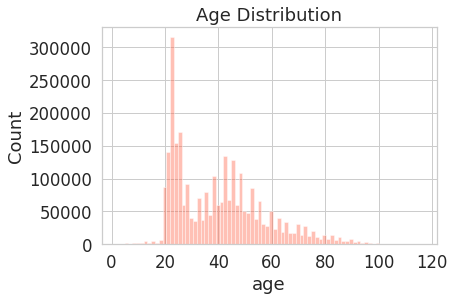

In [ ]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In [ ]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

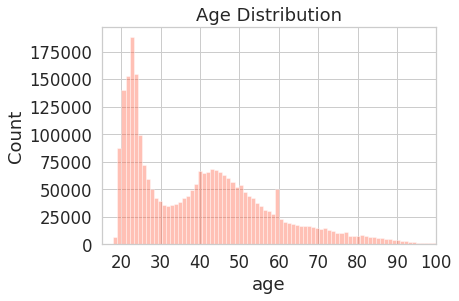

In [ ]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

In [ ]:
df["ind_nuevo"].isnull().sum()

5692

In [ ]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

6

In [ ]:
df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1

In [ ]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

5692

In [ ]:
df.loc[df["antiguedad"].isnull(),"ind_nuevo"].describe()

count    5692.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: ind_nuevo, dtype: float64

In [ ]:
df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"]      = 0

In [ ]:
dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
df["fecha_alta"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


count                 2854530
unique                   6411
top       2014-07-28 00:00:00
freq                    11827
first     1995-01-16 00:00:00
last      2016-05-31 00:00:00
Name: fecha_alta, dtype: object

In [ ]:
pd.Series([i for i in df.indrel]).value_counts()

1.0     2849373
99.0       5157
dtype: int64

In [ ]:
df.loc[df.indrel.isnull(),"indrel"] = 1

In [ ]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

In [ ]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [ ]:
np.sum(df["ind_actividad_cliente"].isnull())

5692

In [ ]:
df.loc[df.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
df["ind_actividad_cliente"].median()

In [ ]:
df.nomprov.unique()

array(['ZARAGOZA', 'GIPUZKOA', 'TOLEDO', 'MADRID', 'HUESCA', 'SALAMANCA',
       'BARCELONA', 'MALAGA', 'ALICANTE', 'ZAMORA', 'TERUEL', 'CACERES',
       'CIUDAD REAL', 'VALENCIA', 'RIOJA, LA', 'LUGO', 'BADAJOZ',
       'CANTABRIA', 'BURGOS', 'AVILA', 'CUENCA', 'ALMERIA', 'ALBACETE',
       'CORUÑA, A', 'OURENSE', 'PALENCIA', 'GIRONA', 'NAVARRA',
       'PALMAS, LAS', 'GUADALAJARA', 'HUELVA', 'VALLADOLID', 'SEVILLA',
       'CORDOBA', 'LERIDA', 'LEON', 'PONTEVEDRA', 'JAEN', 'CASTELLON',
       'CADIZ', 'GRANADA', 'MELILLA', 'MURCIA', 'BALEARS, ILLES',
       'SEGOVIA', nan, 'TARRAGONA', 'ASTURIAS', 'BIZKAIA', 'SORIA',
       'ALAVA', 'SANTA CRUZ DE TENERIFE', 'CEUTA'], dtype=object)

In [ ]:
df.loc[df.nomprov=="CORUÑA, A","nomprov"] = "CORUNA, A"

In [ ]:
df.nomprov.unique()

array(['ZARAGOZA', 'GIPUZKOA', 'TOLEDO', 'MADRID', 'HUESCA', 'SALAMANCA',
       'BARCELONA', 'MALAGA', 'ALICANTE', 'ZAMORA', 'TERUEL', 'CACERES',
       'CIUDAD REAL', 'VALENCIA', 'RIOJA, LA', 'LUGO', 'BADAJOZ',
       'CANTABRIA', 'BURGOS', 'AVILA', 'CUENCA', 'ALMERIA', 'ALBACETE',
       'CORUNA, A', 'OURENSE', 'PALENCIA', 'GIRONA', 'NAVARRA',
       'PALMAS, LAS', 'GUADALAJARA', 'HUELVA', 'VALLADOLID', 'SEVILLA',
       'CORDOBA', 'LERIDA', 'LEON', 'PONTEVEDRA', 'JAEN', 'CASTELLON',
       'CADIZ', 'GRANADA', 'MELILLA', 'MURCIA', 'BALEARS, ILLES',
       'SEGOVIA', nan, 'TARRAGONA', 'ASTURIAS', 'BIZKAIA', 'SORIA',
       'ALAVA', 'SANTA CRUZ DE TENERIFE', 'CEUTA'], dtype=object)

In [ ]:
df.loc[df.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [ ]:
df.renta.isnull().sum()

584260

In [ ]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

In [ ]:
df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

In [ ]:
df.ind_nomina_ult1.isnull().sum()

3356

In [ ]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

In [ ]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' 'F' 'A' 'B' nan]

Unique values for pais_residencia:
['ES' 'DE' nan 'FR' 'PE' 'RO' 'IT' 'BO' 'SG' 'VE' 'CO' 'GB' 'FI' 'GN' 'MX'
 'BR' 'AR' 'AO' 'IL' 'IN' 'LU' 'PT' 'NL' 'RU' 'CL' 'GR' 'US' 'PY' 'BG'
 'ZA' 'CZ' 'DZ' 'MA' 'EC' 'PL' 'DO' 'GT' 'CU' 'CH' 'AU' 'GW' 'BE' 'CA'
 'PK' 'HN' 'KR' 'AE' 'IE' 'UY' 'RS' 'AT' 'GQ' 'UA' 'SE' 'CN' 'EG' 'DK'
 'NO' 'HK' 'TH' 'JP' 'PA' 'PR' 'TR' 'GE' 'CI' 'BY' 'AL' 'NI' 'SK' 'AD'
 'MK' 'CD' 'KZ' 'CM' 'SV' 'SN' 'HR' 'TW' 'MD' 'LT' 'DJ' 'SA']

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-13' '2015-07-29' '2015-07-21' '2015-07-14' '2015-07-30'
 '2015-07-24' '2015-07-08' '2015-07-03' '2015-07-17' '2015-07-22'
 '2015-07-15' '2015-07-09' '2015-07-01' '2015-07-10' '2015-07-28'
 '2015-07-07' '2015-07-20' '2015-07-02' '2015-07-06' '2015-07-27'
 '2015-07-16' '2015-07-23' '2015-08-21' '2015-08-24' '2015-08-18'
 '2015-08-19' '2015-08-27' '2015-08-03' '2015-08-11' '2015-08-05'
 '2015-08-12' '

In [ ]:
df.loc[df.indfall.isnull(),"indfall"] = "N"
df.loc[df.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
df.tiprel_1mes = df.tiprel_1mes.astype("category")

# As suggested by @StephenSmith
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

df.indrel_1mes.fillna("P",inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    df.loc[df[col].isnull(),col] = "UNKNOWN"

In [ ]:
df.isnull().any()

index                    False
fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco

In [ ]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
for col in feature_cols:
    df[col] = df[col].astype(int)

In [ ]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)
unique_months["month_id"] = pd.Series(range(1,1+unique_months.size)) # start with month 1, not 0 to match what we already have
unique_months["month_next_id"] = 1 + unique_months["month_id"]
unique_months.rename(columns={0:"fecha_dato"},inplace=True)
df = pd.merge(df,unique_months,on="fecha_dato")

In [ ]:
def status_change(x):
    diffs = x.diff().fillna(0)
    label = ["Added" if i==1 else "Dropped" if i==-1 else "Maintained" for i in diffs]
    return label

In [ ]:
df.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols]+["ncodpers"]].groupby("ncodpers").transform(status_change)

In [ ]:
df = pd.melt(df, id_vars   = [col for col in df.columns if col not in feature_cols],
            value_vars= [col for col in feature_cols])
df = df.loc[df.value!="Maintained",:]
df.shape

In [ ]:
pylab.rcParams['figure.figsize'] = (6, 4)
with sns.axes_style({
        "axes.facecolor":   "#ffc400",
        "axes.grid"     :    False,
        "figure.facecolor": "#c60b1e"}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=0.75,
                   color="#c60b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=12,labelcolor="#ffc400")#
plt.ylabel("Median Income",size=32,color="#ffc400")
plt.xlabel("City",size=32,color="#ffc400")
plt.title("Income Distribution by City",size=40,color="#ffc400")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

NameError: ignored

# Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import math
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, accuracy_score, f1_score, classification_report,confusion_matrix
import csv
import datetime
import random
from operator import sub
import xgboost as xgb
from sklearn import preprocessing, ensemble

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
mapping_dict = {'ind_empleado'  : {-99:0, 'N':1, 'B':2, 'F':3, 'A':4, 'S':5},
'sexo'          : {'V':0, 'H':1, -99:2},
'ind_nuevo'     : {'0':0, '1':1, -99:1},
'indrel'        : {'1':0, '99':1, -99:1},
'indrel_1mes'   : {-99:0, '1.0':1, '1':1, '2.0':2, '2':2, '3.0':3, '3':3, '4.0':4, '4':4, 'P':5},
'tiprel_1mes'   : {-99:0, 'I':1, 'A':2, 'P':3, 'R':4, 'N':5},
'indresi'       : {-99:0, 'S':1, 'N':2},
'indext'        : {-99:0, 'S':1, 'N':2},
#'conyuemp'      : {-99:0, 'S':1, 'N':2},
'indfall'       : {-99:0, 'S':1, 'N':2},
#'tipodom'       : {-99:0, '1':1},
'ind_actividad_cliente' : {'0':0, '1':1, -99:2},
'segmento'      : {'02 - PARTICULARES':0, '03 - UNIVERSITARIO':1, '01 - TOP':2, -99:3},
'pais_residencia' : {'LV': 102, 'BE': 12, 'BG': 50, 'BA': 61, 'BM': 117, 'BO': 62, 'JP': 82, 'JM': 116, 'BR': 17, 'BY': 64, 'BZ': 113, 'RU': 43, 'RS': 89, 'RO': 41, 'GW': 99, 'GT': 44, 'GR': 39, 'GQ': 73, 'GE': 78, 'GB': 9, 'GA': 45, 'GN': 98, 'GM': 110, 'GI': 96, 'GH': 88, 'OM': 100, 'HR': 67, 'HU': 106, 'HK': 34, 'HN': 22, 'AD': 35, 'PR': 40, 'PT': 26, 'PY': 51, 'PA': 60, 'PE': 20, 'PK': 84, 'PH': 91, 'PL': 30, 'EE': 52, 'EG': 74, 'ZA': 75, 'EC': 19, 'AL': 25, 'VN': 90, 'ET': 54, 'ZW': 114, 'ES': 0, 'MD': 68, 'UY': 77, 'MM': 94, 'ML': 104, 'US': 15, 'MT': 118, 'MR': 48, 'UA': 49, 'MX': 16, 'IL': 42, 'FR': 8, 'MA': 38, 'FI': 23, 'NI': 33, 'NL': 7, 'NO': 46, 'NG': 83, 'NZ': 93, 'CI': 57, 'CH': 3, 'CO': 21, 'CN': 28, 'CM': 55, 'CL': 4, 'CA': 2, 'CG': 101, 'CF': 109, 'CD': 112, 'CZ': 36, 'CR': 32, 'CU': 72, 'KE': 65, 'KH': 95, 'SV': 53, 'SK': 69, 'KR': 87, 'KW': 92, 'SN': 47, 'SL': 97, 'KZ': 111, 'SA': 56, 'SG': 66, 'SE': 24, 'DO': 11, 'DJ': 115, 'DK': 76, 'DE': 10, 'DZ': 80, 'MK': 105, -99: 1, 'LB': 81, 'TW': 29, 'TR': 70, 'TN': 85, 'LT': 103, 'LU': 59, 'TH': 79, 'TG': 86, 'LY': 108, 'AE': 37, 'VE': 14, 'IS': 107, 'IT': 18, 'AO': 71, 'AR': 13, 'AU': 63, 'AT': 6, 'IN': 31, 'IE': 5, 'QA': 58, 'MZ': 27},
'canal_entrada' : {'013': 49, 'KHP': 160, 'KHQ': 157, 'KHR': 161, 'KHS': 162, 'KHK': 10, 'KHL': 0, 'KHM': 12, 'KHN': 21, 'KHO': 13, 'KHA': 22, 'KHC': 9, 'KHD': 2, 'KHE': 1, 'KHF': 19, '025': 159, 'KAC': 57, 'KAB': 28, 'KAA': 39, 'KAG': 26, 'KAF': 23, 'KAE': 30, 'KAD': 16, 'KAK': 51, 'KAJ': 41, 'KAI': 35, 'KAH': 31, 'KAO': 94, 'KAN': 110, 'KAM': 107, 'KAL': 74, 'KAS': 70, 'KAR': 32, 'KAQ': 37, 'KAP': 46, 'KAW': 76, 'KAV': 139, 'KAU': 142, 'KAT': 5, 'KAZ': 7, 'KAY': 54, 'KBJ': 133, 'KBH': 90, 'KBN': 122, 'KBO': 64, 'KBL': 88, 'KBM': 135, 'KBB': 131, 'KBF': 102, 'KBG': 17, 'KBD': 109, 'KBE': 119, 'KBZ': 67, 'KBX': 116, 'KBY': 111, 'KBR': 101, 'KBS': 118, 'KBP': 121, 'KBQ': 62, 'KBV': 100, 'KBW': 114, 'KBU': 55, 'KCE': 86, 'KCD': 85, 'KCG': 59, 'KCF': 105, 'KCA': 73, 'KCC': 29, 'KCB': 78, 'KCM': 82, 'KCL': 53, 'KCO': 104, 'KCN': 81, 'KCI': 65, 'KCH': 84, 'KCK': 52, 'KCJ': 156, 'KCU': 115, 'KCT': 112, 'KCV': 106, 'KCQ': 154, 'KCP': 129, 'KCS': 77, 'KCR': 153, 'KCX': 120, 'RED': 8, 'KDL': 158, 'KDM': 130, 'KDN': 151, 'KDO': 60, 'KDH': 14, 'KDI': 150, 'KDD': 113, 'KDE': 47, 'KDF': 127, 'KDG': 126, 'KDA': 63, 'KDB': 117, 'KDC': 75, 'KDX': 69, 'KDY': 61, 'KDZ': 99, 'KDT': 58, 'KDU': 79, 'KDV': 91, 'KDW': 132, 'KDP': 103, 'KDQ': 80, 'KDR': 56, 'KDS': 124, 'K00': 50, 'KEO': 96, 'KEN': 137, 'KEM': 155, 'KEL': 125, 'KEK': 145, 'KEJ': 95, 'KEI': 97, 'KEH': 15, 'KEG': 136, 'KEF': 128, 'KEE': 152, 'KED': 143, 'KEC': 66, 'KEB': 123, 'KEA': 89, 'KEZ': 108, 'KEY': 93, 'KEW': 98, 'KEV': 87, 'KEU': 72, 'KES': 68, 'KEQ': 138, -99: 6, 'KFV': 48, 'KFT': 92, 'KFU': 36, 'KFR': 144, 'KFS': 38, 'KFP': 40, 'KFF': 45, 'KFG': 27, 'KFD': 25, 'KFE': 148, 'KFB': 146, 'KFC': 4, 'KFA': 3, 'KFN': 42, 'KFL': 34, 'KFM': 141, 'KFJ': 33, 'KFK': 20, 'KFH': 140, 'KFI': 134, '007': 71, '004': 83, 'KGU': 149, 'KGW': 147, 'KGV': 43, 'KGY': 44, 'KGX': 24, 'KGC': 18, 'KGN': 11}
}
cat_cols = list(mapping_dict.keys())

target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
target_cols = target_cols[2:]

def getTarget(row):
	tlist = []
	for col in target_cols:
		if row[col].strip() in ['', 'NA']:
			target = 0
		else:
			target = int(float(row[col]))
		tlist.append(target)
	return tlist

def getIndex(row, col):
	val = row[col].strip()
	if val not in ['','NA']:
		ind = mapping_dict[col][val]
	else:
		ind = mapping_dict[col][-99]
	return ind

def getMonth(row):
    return int(row['fecha_dato'].split('-')[1])

def getjoinMonth(row):
    if row['fecha_alta'].strip() == 'NA' or row['fecha_alta'].strip() == '':
        return int(random.choice([1,2,3,4,5,6,7,8,9,10,11,12]))
    else:
        return int(row['fecha_alta'].split('-')[1])

def getAge(row):
	mean_age = 40.
	min_age = 18.
	max_age = 100.
	range_age = max_age - min_age
	age = row['age'].strip()
	if age == 'NA' or age == '':
		age = mean_age
	else:
		age = float(age)
		if age < min_age:
			age = min_age
		elif age > max_age:
			age = max_age
	return round( (age - min_age) / range_age, 4)

def getCustSeniority(row):
	min_value = 0.
	max_value = 256.
	range_value = max_value - min_value
	missing_value = 0.
	cust_seniority = row['antiguedad'].strip()
	if cust_seniority == 'NA' or cust_seniority == '':
		cust_seniority = missing_value
	else:
		cust_seniority = float(cust_seniority)
		if cust_seniority < min_value:
			cust_seniority = min_value
		elif cust_seniority > max_value:
			cust_seniority = max_value
	return round((cust_seniority-min_value) / range_value, 4)

def getRent(row):
	min_value = 0.
	max_value = 1500000.
	range_value = max_value - min_value
	renta_dict = {'ALBACETE': 76895,  'ALICANTE': 60562,  'ALMERIA': 77815,  'ASTURIAS': 83995,  'AVILA': 78525,  'BADAJOZ': 60155,  'BALEARS, ILLES': 114223,  'BARCELONA': 135149,  'BURGOS': 87410, 'NAVARRA' : 101850,
    'CACERES': 78691,  'CADIZ': 75397,  'CANTABRIA': 87142,  'CASTELLON': 70359,  'CEUTA': 333283, 'CIUDAD REAL': 61962,  'CORDOBA': 63260,  'CORUÑA, A': 103567,  'CUENCA': 70751,  'GIRONA': 100208,  'GRANADA': 80489,
    'GUADALAJARA': 100635,  'HUELVA': 75534,  'HUESCA': 80324,  'JAEN': 67016,  'LEON': 76339,  'LERIDA': 59191,  'LUGO': 68219,  'MADRID': 141381,  'MALAGA': 89534,  'MELILLA': 116469, 'GIPUZKOA': 101850,
    'MURCIA': 68713,  'OURENSE': 78776,  'PALENCIA': 90843,  'PALMAS, LAS': 78168,  'PONTEVEDRA': 94328,  'RIOJA, LA': 91545,  'SALAMANCA': 88738,  'SANTA CRUZ DE TENERIFE': 83383, 'ALAVA': 101850, 'BIZKAIA' : 101850,
    'SEGOVIA': 81287,  'SEVILLA': 94814,  'SORIA': 71615,  'TARRAGONA': 81330,  'TERUEL': 64053,  'TOLEDO': 65242,  'UNKNOWN': 103689,  'VALENCIA': 73463,  'VALLADOLID': 92032,  'ZAMORA': 73727,  'ZARAGOZA': 98827}

	#missing_value = 101850.
	rent = row['renta'].strip()
	if rent == 'NA' or rent == '':
	    if row['nomprov'] == 'NA' or row['nomprov'] == '':
	        rent = float(renta_dict['UNKNOWN'])
	    else:
	        rent = float(renta_dict[row['nomprov']])
	else:
		rent = float(rent)
		if rent < min_value:
			rent = min_value
		elif rent > max_value:
			rent = max_value

	return round((rent-min_value) / range_value, 6)
    
def processData(in_file_name, cust_dict):
	x_vars_list = []
	y_vars_list = []
	for row in csv.DictReader(in_file_name):
		# use only the four months as specified by breakfastpirate #
		if row['fecha_dato'] not in ['2015-05-28', '2015-06-28', '2016-05-28', '2016-06-28']:
			continue

		cust_id = int(row['ncodpers'])
		if row['fecha_dato'] in ['2015-05-28', '2016-05-28']:	
			target_list = getTarget(row)
			cust_dict[cust_id] =  target_list[:]
			continue

		x_vars = []
		for col in cat_cols:
			x_vars.append( getIndex(row, col) )
		sex = getIndex(row, 'sexo')
		age = getAge(row)
		x_vars.append( age )
		x_vars.append( getCustSeniority(row) )
		income = getRent(row) 
		x_vars.append( income )
		#x_vars.append( getMarriageIndex(row, age, sex, income) )

		if row['fecha_dato'] == '2016-06-28':
			prev_target_list = cust_dict.get(cust_id, [0]*22)
			x_vars_list.append(x_vars + prev_target_list)
		elif row['fecha_dato'] == '2015-06-28':
			prev_target_list = cust_dict.get(cust_id, [0]*22)
			target_list = getTarget(row)
			new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
			if sum(new_products) > 0:
				for ind, prod in enumerate(new_products):
					if prod>0:
						assert len(prev_target_list) == 22
						x_vars_list.append(x_vars+prev_target_list)
						y_vars_list.append(ind)

	return x_vars_list, y_vars_list, cust_dict

In [4]:
def processDataMK(in_file_name, cust_dict, lag_cust_dict):
    x_vars_list = []
    y_vars_list = []
    
    for row in csv.DictReader(in_file_name):
        if row['fecha_dato'] not in ['2015-04-28', '2015-05-28', '2015-06-28', '2016-04-28', '2016-05-28', '2016-06-28']:
            continue

        cust_id = int(row['ncodpers'])

        if (row['fecha_dato'] in ['2015-04-28', '2016-04-28'] ):
            target_list = getTarget(row)
            lag_cust_dict[cust_id] =  target_list[:]
            continue
        
        if (row['fecha_dato'] in ['2015-05-28', '2016-05-28'] ):
            target_list = getTarget(row)
            cust_dict[cust_id] =  target_list[:]
            continue
        
        x_vars = []
        for col in cat_cols:
            x_vars.append( getIndex(row, col) )

        sex = getIndex(row, 'sexo')
        age = getAge(row)
        x_vars.append(age)
        x_vars.append( getMonth(row))
        x_vars.append( getjoinMonth(row))
        x_vars.append(getCustSeniority(row))
        income = getRent(row)
        x_vars.append(income)

        if row['fecha_dato'] == '2016-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            lag_target_list = lag_cust_dict.get(cust_id, [0]*22)
            x_vars_list.append(x_vars + prev_target_list + lag_target_list)
            
        elif row['fecha_dato'] == '2015-06-28':
            prev_target_list = cust_dict.get(cust_id, [0]*22)
            lag_target_list = lag_cust_dict.get(cust_id, [0]*22)
            target_list = getTarget(row)
            new_products = [max(x1 - x2,0) for (x1, x2) in zip(target_list, prev_target_list)]
            if sum(new_products) > 0:
                for ind, prod in enumerate(new_products):
                    if prod>0:
                        assert len(prev_target_list) == 22
                        x_vars_list.append(x_vars+prev_target_list+lag_target_list)
                        y_vars_list.append(ind)
        
        
    return x_vars_list, y_vars_list, cust_dict, lag_cust_dict

In [7]:
start_time = datetime.datetime.now()
train_file =  open("/content/gdrive/My Drive/data/train_ver2.csv")
print('Starting file processing')
x_vars_list, y_vars_list, cust_dict, lag_cust_dict = processDataMK(train_file, {}, {})
print('Finished file processing')
train_X = np.array(x_vars_list)
train_y = np.array(y_vars_list)
print(np.unique(train_y))
del x_vars_list, y_vars_list
train_file.close()
print(train_X.shape, train_y.shape)
print(datetime.datetime.now()-start_time)
test_file = open("/content/gdrive/My Drive/data/test_ver2.csv")
x_vars_list, y_vars_list, cust_dict, lag_cust_dict = processDataMK(test_file, cust_dict, lag_cust_dict)
test_X = np.array(x_vars_list)
del x_vars_list
test_file.close()
print(test_X.shape)
print(datetime.datetime.now()-start_time)

Starting file processing
Finished file processing
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(45679, 62) (45679,)
0:04:34.769560
(929615, 62)
0:05:09.435550


In [8]:
train_X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [9]:
train_X.shape

(45679, 62)

In [11]:
cust_dict

{1061260: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061283: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061284: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061336: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061286: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061290: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061288: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061289: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061281: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061340: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061291: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061292: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 1061293: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
def runXGB(train_X, train_y, seed_val=42):
	param = {}
	param['objective'] = 'multi:softprob'
	param['eta'] = 0.16
	param['max_depth'] = 5
	param['silent'] = 1
	param['num_class'] = 22
	param['eval_metric'] = "mlogloss"
	param['min_child_weight'] = 12
	param['subsample'] = 0.85
	param['colsample_bytree'] = 0.9
	param['seed'] = seed_val
	num_rounds = 70

	plst = list(param.items())
	xgtrain = xgb.DMatrix(train_X, label=train_y)
	model = xgb.train(plst, xgtrain, num_rounds)	
	return model

In [13]:
print("Building model..")
model = runXGB(train_X, train_y, seed_val=0)
del train_X, train_y
print("Predicting..")
xgtest = xgb.DMatrix(test_X)
preds = model.predict(xgtest)
del test_X, xgtest
print(datetime.datetime.now()-start_time)

print("Getting the top products..")
test_id = np.array(pd.read_csv("/content/gdrive/My Drive/data/test_ver2.csv", usecols=['ncodpers'])['ncodpers'])
new_products = []
for i, idx in enumerate(test_id):
    new_products.append([max(x1 - x2,0) for (x1, x2) in zip(preds[i,:], cust_dict[idx])])
target_cols = np.array(target_cols)
preds = np.argsort(np.array(new_products), axis=1)
preds = np.fliplr(preds)[:,:7]
final_preds = [" ".join(list(target_cols[pred])) for pred in preds]
out_df = pd.DataFrame({'ncodpers':test_id, 'added_products':final_preds})
out_df.to_csv('sub_xgb_new.csv', index=False)
print(datetime.datetime.now()-start_time)

Building model..
Predicting..
0:15:16.433340
Getting the top products..
0:16:41.093117


In [15]:
len(preds[0, :])

7

In [ ]:
len(out_df["added_products"])

In [ ]:
out_df